# Time Series Classification and Clustering Assignment

In [1]:
%reload_ext nb_black
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

<IPython.core.display.Javascript object>

### Import the Walmart stock price data set (WMT_data.csv).

In [2]:
data = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%205/WMT_data.csv"
)

<IPython.core.display.Javascript object>

In [3]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,71.20,71.64,71.070,71.48,5906823,WMT
1,2013-02-11,71.25,71.51,70.530,71.40,6202534,WMT
2,2013-02-12,71.49,71.66,71.100,71.40,4761910,WMT
3,2013-02-13,71.29,71.70,71.210,71.39,3969807,WMT
4,2013-02-14,71.10,71.23,70.755,70.82,6820952,WMT


<IPython.core.display.Javascript object>

### Transform the data to be able to predict minor direction changes in the stock's price, given 180 days of history.

- Remember to calculate daily returns from the observed values (closing price).
- Make the critera for identifying a direction change when the observed values (closing price) cross the 5 day moving average.
- Create a binary column that defaults to 0 unless the criteria is met (then updates to 1).
- Shift the data set so that you have 180 days of history for each record.

In [4]:
data["date"] = pd.to_datetime(data["date"])
data.columns = ["Date", "Open", "High", "Low", "Observed", "Volume", "Ticker"]
data.head()

,Date,Open,High,Low,Observed,Volume,Ticker
0,2013-02-08,71.20,71.64,71.070,71.48,5906823,WMT
1,2013-02-11,71.25,71.51,70.530,71.40,6202534,WMT
2,2013-02-12,71.49,71.66,71.100,71.40,4761910,WMT
3,2013-02-13,71.29,71.70,71.210,71.39,3969807,WMT
4,2013-02-14,71.10,71.23,70.755,70.82,6820952,WMT


<IPython.core.display.Javascript object>

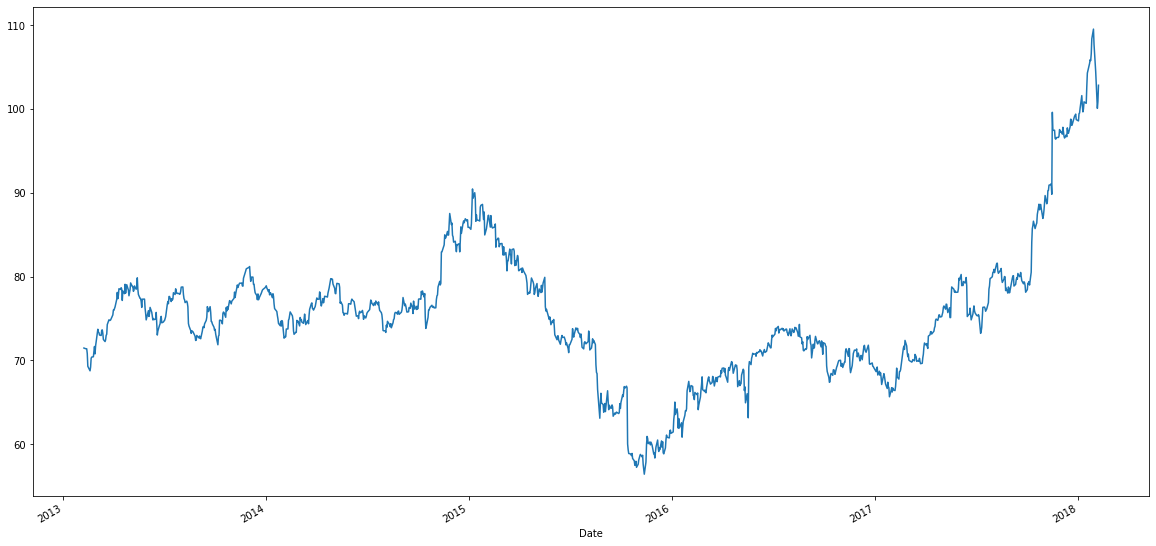

<IPython.core.display.Javascript object>

In [5]:
data.set_index("Date")["Observed"].plot(figsize=(20, 10))

In [6]:
data["Returns"] = data["Observed"].pct_change(1)
data["MA_5"] = data["Observed"].rolling(5).mean()
data["MA_10"] = data["Observed"].rolling(10).mean()
data["Trend"] = "None"
data.loc[(data["MA_5"] < data["MA_10"]), "Trend"] = "Negative"
data.loc[(data["MA_5"] > data["MA_10"]), "Trend"] = "Positive"
data["Change"] = data["Trend"].eq(data["Trend"].shift())

data["Binary"] = 0
data.loc[(data["Change"] == False) & (data["Trend"] != "None"), "Binary"] = 1

data.dropna(inplace=True)
data.tail(100)

,Date,Open,High,Low,Observed,Volume,Ticker,Returns,MA_5,MA_10,Trend,Change,Binary
1159,2017-09-15,79.81,80.75,79.27,80.38,13317757,WMT,0.008785,79.722,79.586,Positive,True,0
1160,2017-09-18,80.21,81.12,79.95,80.00,8176067,WMT,-0.004728,79.906,79.749,Positive,True,0
1161,2017-09-19,80.18,80.46,79.70,80.05,6174358,WMT,0.000625,79.994,79.774,Positive,True,0
1162,2017-09-20,80.17,80.56,79.87,80.50,5318194,WMT,0.005621,80.122,79.816,Positive,True,0
1163,2017-09-21,80.57,80.57,79.72,80.01,6430256,WMT,-0.006087,80.188,79.805,Positive,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,105.96,106.56,105.18,105.52,6386836,WMT,-0.010131,107.558,106.612,Positive,True,0
1255,2018-02-02,105.15,106.47,104.15,104.48,9253068,WMT,-0.009856,106.776,106.601,Positive,True,0
1256,2018-02-05,103.40,104.61,97.09,100.09,12561594,WMT,-0.042018,104.884,106.065,Negative,False,1
1257,2018-02-06,97.64,101.08,97.25,100.90,16413797,WMT,0.008093,103.518,105.565,Negative,True,0


<IPython.core.display.Javascript object>

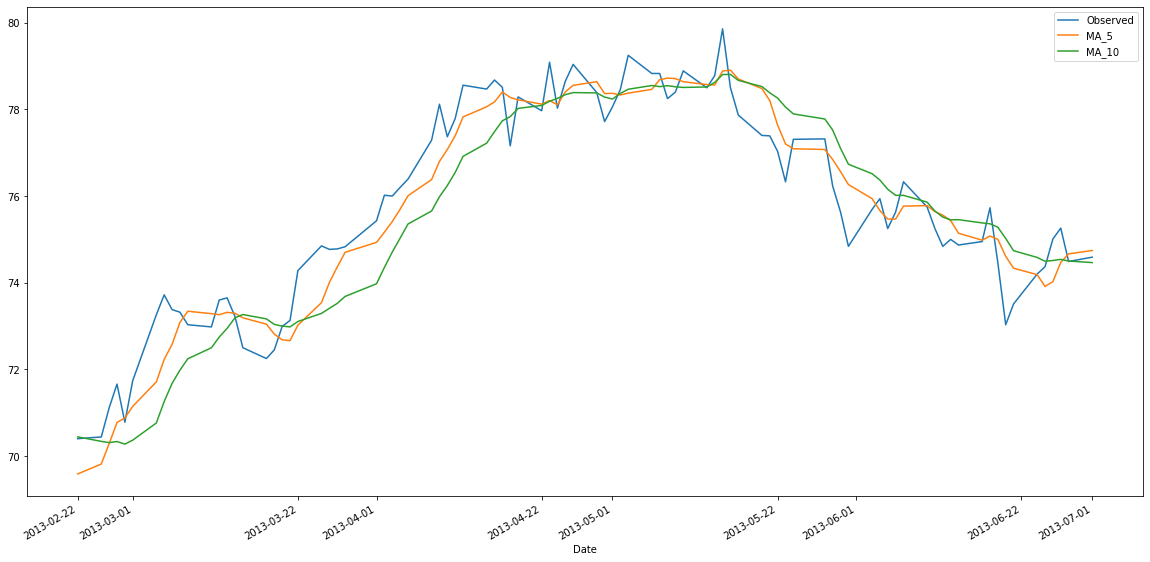

<IPython.core.display.Javascript object>

In [7]:
data.set_index("Date").iloc[:90][["Observed", "MA_5", "MA_10"]].plot(figsize=(20, 10))

In [8]:
transformed = data[["Date", "Returns", "Binary"]]
transformed.head()

,Date,Returns,Binary
9,2013-02-22,0.001993,1
10,2013-02-25,0.000568,0
11,2013-02-26,0.009512,0
12,2013-02-27,0.007734,1
13,2013-02-28,-0.012280,0


<IPython.core.display.Javascript object>

In [9]:
history = 180
future = 0

shifts = [x + future for x in list(range(1, history + 1))]

for shift in shifts:
    transformed[f"t-{shift}"] = transformed["Returns"].shift(shift)

transformed.dropna(inplace=True)

C:\Users\jlim7\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<IPython.core.display.Javascript object>

In [10]:
transformed.head()

,Date,Returns,Binary,t-1,t-2,t-3,t-4,t-5,t-6,t-7,...,t-171,t-172,t-173,t-174,t-175,t-176,t-177,t-178,t-179,t-180
189,2013-11-07,-0.008316,0,0.009558,0.001164,0.003374,0.004169,-0.002080,-0.001947,-0.001037,...,-0.000818,-0.004612,0.006279,0.021188,0.013563,-0.012280,0.007734,0.009512,0.000568,0.001993
190,2013-11-08,0.005806,0,-0.008316,0.009558,0.001164,0.003374,0.004169,-0.002080,-0.001947,...,-0.003955,-0.000818,-0.004612,0.006279,0.021188,0.013563,-0.012280,0.007734,0.009512,0.000568
191,2013-11-11,0.013468,0,0.005806,-0.008316,0.009558,0.001164,0.003374,0.004169,-0.002080,...,-0.000685,-0.003955,-0.000818,-0.004612,0.006279,0.021188,0.013563,-0.012280,0.007734,0.009512
192,2013-11-12,-0.003797,0,0.013468,0.005806,-0.008316,0.009558,0.001164,0.003374,0.004169,...,0.008495,-0.000685,-0.003955,-0.000818,-0.004612,0.006279,0.021188,0.013563,-0.012280,0.007734
193,2013-11-13,0.002414,0,-0.003797,0.013468,0.005806,-0.008316,0.009558,0.001164,0.003374,...,0.000679,0.008495,-0.000685,-0.003955,-0.000818,-0.004612,0.006279,0.021188,0.013563,-0.012280


<IPython.core.display.Javascript object>

### Train a Logistic Regression classification model on the transformed data.

In [17]:
X = transformed.drop(columns=["Date", "Returns", "Binary"])
y = transformed["Binary"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False, random_state=13,
)

<IPython.core.display.Javascript object>

In [18]:
model = LogisticRegression(class_weight="balanced")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

<IPython.core.display.Javascript object>

### Run a classification report and evaluate the performance of the classifier.

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78       195
           1       0.08      0.26      0.12        19

    accuracy                           0.65       214
   macro avg       0.49      0.48      0.45       214
weighted avg       0.83      0.65      0.72       214



<IPython.core.display.Javascript object>

### Transform the data again to have 10 days of history for clustering.

In [20]:
transformed = data[["Date", "Returns", "Binary"]]

history = 10
future = 0

shifts = [x + future for x in list(range(1, history + 1))]

for shift in shifts:
    transformed["t-" + str(shift)] = transformed["Returns"].shift(shift)

transformed.dropna(inplace=True)

x = transformed.set_index("Date").drop(["Returns", "Binary"], axis=1)

C:\Users\jlim7\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<IPython.core.display.Javascript object>

### Train a K Means clustering model on the data. 

Try different values for K and see how the summary changes.

In [21]:
def kmeans(df, clusters):
    model = KMeans(n_clusters=clusters, random_state=42)
    clusters = model.fit_predict(df)
    results = df.copy()
    results["Cluster"] = clusters

    cluster_size = results.groupby(["Cluster"]).size().reset_index()
    cluster_size.columns = ["Cluster", "Count"]
    cluster_means = results.groupby(["Cluster"], as_index=False).mean()
    summary = pd.merge(cluster_size, cluster_means, on="Cluster")

    return results, summary

<IPython.core.display.Javascript object>

In [22]:
kmeans(X, 3)

(           t-1       t-2       t-3       t-4       t-5       t-6       t-7  \
 189   0.009558  0.001164  0.003374  0.004169 -0.002080 -0.001947 -0.001037   
 190  -0.008316  0.009558  0.001164  0.003374  0.004169 -0.002080 -0.001947   
 191   0.005806 -0.008316  0.009558  0.001164  0.003374  0.004169 -0.002080   
 192   0.013468  0.005806 -0.008316  0.009558  0.001164  0.003374  0.004169   
 193  -0.003797  0.013468  0.005806 -0.008316  0.009558  0.001164  0.003374   
 ...        ...       ...       ...       ...       ...       ...       ...   
 1254 -0.010489 -0.016613  0.010702  0.016792  0.007657 -0.001039  0.004267   
 1255 -0.010131 -0.010489 -0.016613  0.010702  0.016792  0.007657 -0.001039   
 1256 -0.009856 -0.010131 -0.010489 -0.016613  0.010702  0.016792  0.007657   
 1257 -0.042018 -0.009856 -0.010131 -0.010489 -0.016613  0.010702  0.016792   
 1258  0.008093 -0.042018 -0.009856 -0.010131 -0.010489 -0.016613  0.010702   
 
            t-8       t-9      t-10  ...     t-172

<IPython.core.display.Javascript object>

### Visualize the summary of the clustering results as a heatmap.